<a href="https://colab.research.google.com/github/TonyIssacJames/EIP_public/blob/master/Copy_of_Quiz_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [2]:
# https://keras.io/
!pip install -q keras
import datetime
import keras
print(datetime.datetime.now())

2019-06-11 21:36:38.716859


In [3]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist
print(datetime.datetime.now())

2019-06-11 21:36:43.579587


### Load pre-shuffled MNIST data into train and test sets

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(datetime.datetime.now())

11493376/11490434 [==============================] - 2s 0us/step
2019-06-11 21:36:55.486818


(60000, 28, 28)
2019-06-11 21:36:59.526140


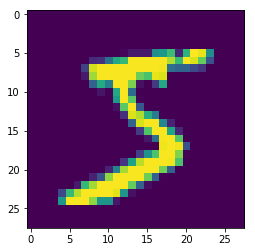

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])
print(datetime.datetime.now())

In [6]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print(datetime.datetime.now())

2019-06-11 21:37:09.093207


In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(datetime.datetime.now())

2019-06-11 21:37:22.457461


In [8]:
y_train[:10]
print(datetime.datetime.now())

2019-06-11 21:37:28.025930


In [9]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(datetime.datetime.now())

2019-06-11 21:37:31.311066


In [10]:
Y_train[:10]
print(datetime.datetime.now())

2019-06-11 21:37:36.140481


In [54]:
from keras.models import Model
from keras.layers import Input, Dense, Conv2D 

x1 = Input(shape=(28, 28, 1))

x2 = Conv2D(64, (3, 3), padding='same', activation='relu')(x1)
x3 = Conv2D(64, (3, 3), padding='same', activation='relu')(x2)
x4 = MaxPooling2D((2, 2), strides=(1, 1), padding='same')(x3)
x5 = Conv2D(64, (3, 3), padding='same', activation='relu')(x4)
x6 = Conv2D(64, (3, 3), padding='same', activation='relu')(x5)
x7 = Conv2D(64, (3, 3), padding='same', activation='relu')(x6)
x8 = MaxPooling2D((2, 2), strides=(1, 1), padding='same')(x7)
x9 = Conv2D(64, (3, 3), padding='same', activation='relu')(x8)
x10 = Conv2D(64, (3, 3), padding='same', activation='relu')(x9)
x11 = Conv2D(64, (3, 3), padding='same', activation='relu')(x10)


stack = keras.layers.concatenate([x2, x3, x4,x5,x6,x7,x8,x9,x10, x11], axis=0)

x12 = Conv2D(10, (28, 28), activation='softmax')(stack)
out = Flatten()(x12)

model = Model(inputs=x1, outputs=out)
print(datetime.datetime.now())

2019-06-11 22:42:06.369689


In [55]:
model.summary()

print(datetime.datetime.now())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 28, 28, 64)   640         input_11[0][0]                   
__________________________________________________________________________________________________
conv2d_95 (Conv2D)              (None, 28, 28, 64)   36928       conv2d_94[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_22 (MaxPooling2D) (None, 28, 28, 64)   0           conv2d_95[0][0]                  
__________________________________________________________________________________________________
conv2d_96 

In [56]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
print(datetime.datetime.now())

2019-06-11 22:42:17.925109


In [57]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
print(datetime.datetime.now())

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10


InvalidArgumentError: ignored

In [25]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(datetime.datetime.now())

2019-06-11 22:08:14.636666


In [26]:
print(score)
print(datetime.datetime.now())

[0.03488085218755764, 0.9906]
2019-06-11 22:08:18.764817
